In [169]:
import numpy as np

var('x')
def lagrange_poly(Xs, Ys):
    n = len(Xs)
    L = 0
    for i in range(n):
        Lk = Ys[i]
        for j in range(n):
            if i==j: continue
            
            Lk *= (x-Xs[j])/(Xs[i]-Xs[j])
        L += Lk
    return L.expand()
                
def callme(y=0):
    xs = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5]
    ys = [y]+map(sin, xs[1:])
    
    f = lagrange_poly(xs, ys)
#     show(f)
    
    return plot(f, (x, -1, 5), ymin=-2, ymax=2)
    
# a = animate([callme(-1 + i*0.05) for i in range(41)])
# a.show()

In [ ]:
a.save('interpolation.gif')

In [98]:
D5 = DihedralGroup(5)
show(D5.composition_series())

[Subgroup of (Dihedral group of order 10 as a permutation group) generated by [(2,5)(3,4), (1,2,3,4,5)],
 Subgroup of (Dihedral group of order 10 as a permutation group) generated by [(1,2,3,4,5)],
 Subgroup of (Dihedral group of order 10 as a permutation group) generated by [()]]

In [99]:
var('a b c')

M = matrix([
    [a, b, c],
    [b, c, a],
    [c, a, b]
])

show(M.eigenvalues())
show(M.charpoly())

[-sqrt(a^2 - a*b + b^2 - a*c - b*c + c^2),
 sqrt(a^2 - a*b + b^2 - a*c - b*c + c^2),
 a + b + c]

x^3 + (-a - b - c)*x^2 + (-a^2 + a*b - b^2 + a*c + b*c - c^2)*x + a^3 + b^3 - 3*a*b*c + c^3

### Continuous Polynomials of Degree atmost 3  on $[-\pi, \pi]$

Let $P_3[0, 1]$ be the vector space $V$ with the inner product

\begin{equation*}
    \langle f, g \rangle = \int_{-1}^1 f(x)\cdot g(x)dx 
\end{equation*}

Choose a basis $\beta = \left( 1, x, x^2, x^3 \right)$. Then From Gram smith orthogonalisation we get

In [102]:
def dot(f, g):
    """ Dot product of vectors of P3[-1, 1]"""
    return integrate(f*g, (x, -1, 1))

def norm(f):
    """Norm of a vector `f`"""
    return sqrt(integrate(f*f, (x, -1, 1)))

B = [1, x, x^2, x^3]  # Basis
E = []                # orthogonal basis

# Start `Gram-Schmidt` orthogonization! 
for i in range(len(B)):
    e = B[i]
    for j in range(i):
        e = e- dot(E[j], B[i])*E[j]
#     e = e/sqrt(dot(e, e))
    e = e/norm(e)
    E.append(e.simplify())

_=[show(e) for e in E]

1/2*sqrt(2)

1/2*sqrt(3)*sqrt(2)*x

1/4*sqrt(5)*sqrt(2)*(3*x^2 - 1)

1/4*sqrt(7)*sqrt(2)*(5*x^3 - 3*x)

In [130]:
M = matrix([[dot(E[i], E[j]) for i in range(len(E))] for j in range(len(E))])
show(M)

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]

In [110]:
H = exp(-x^2)
show(H)

hp = H
for i in range(1, 5):
    hp = diff(hp, x)
    poly = hp/exp(-x^2)/2^i

    show(poly.expand())

e^(-x^2)

-x

x^2 - 1/2

-x^3 + 3/2*x

x^4 - 3*x^2 + 3/4

In [109]:
M = matrix(CDF, [
    [1, -1],
    [1,  1]
])

show(M.SVD())

(
[-0.7071067811865472 -0.7071067811865475]
[-0.7071067811865475  0.7071067811865475],

[1.4142135623730951                0.0]  [-1.0  0.0]
[               0.0  1.414213562373095], [ 0.0  1.0]
)

x |--> sin(1/x)

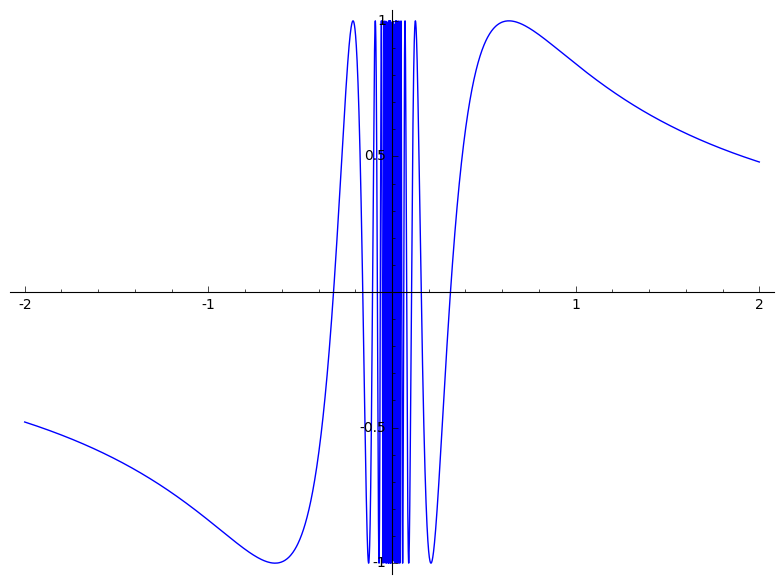

In [129]:
f(x) = sin(1/x)
show(f)

plot(f, (x, -2, 2), plot_points=1000)

In [134]:
N = matrix(QQ, [
    [1, 1, 1],
    [1, 2, 1],
    [2, 2, 2]
])
SI = N.pseudoinverse()
show(SI)

show(SI*N)

show(N*SI)

[ 1/5 -1/2  2/5]
[-1/5    1 -2/5]
[ 1/5 -1/2  2/5]

[1/2   0 1/2]
[  0   1   0]
[1/2   0 1/2]

[1/5   0 2/5]
[  0   1   0]
[2/5   0 4/5]

In [ ]:
import numpy as np

def HouseHolder(v, n):
    return identity_matrix(n) - 2* v*v.transpose()/((v.transpose()*v)[0][0])

for i in range(2, 10):
    v = matrix(QQ, np.ones((i, 1)))
    show(HouseHolder(v, i))

In [161]:
A = matrix(CDF, np.random.randn(20, 5))
b = matrix(CDF, np.random.randn(20, 1))

show(A.pseudoinverse()*b)
AtA = (A.transpose()*A).inverse() * A.transpose()

show(AtA*b)

SyntaxError: EOL while scanning string literal (<ipython-input-161-eabd22def610>, line 8)

In [174]:
P = lagrange_poly([1, 2, 3, 4, 5], [1, 4, 8, 16, 69])
show(P.expand())
for i in (1..6):
    print(P(i))

19/12*x^4 - 46/3*x^3 + 635/12*x^2 - 433/6*x + 34

1
4
8
16
69
246


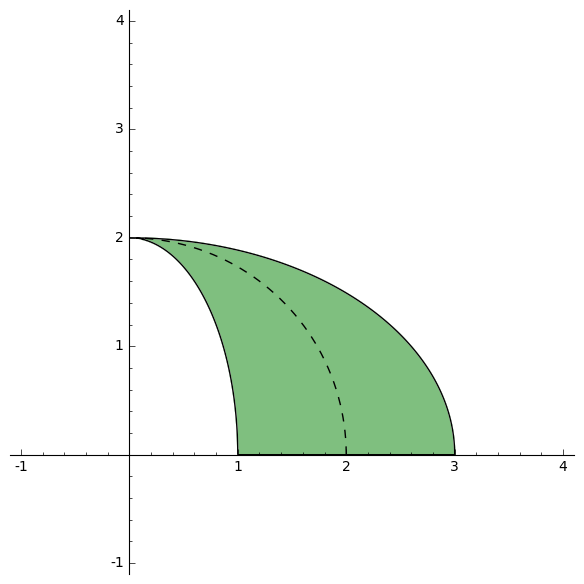

In [195]:
var('x y')
region_plot([x^2+y^2/4>=1, x^2/9+y^2/4<=1, y>=0, x>=0], (x, -1, 4),(y, -1, 4),
           incol='green', bordercol='black', alpha=0.5, plot_points=500)+\
parametric_plot((2*cos(x), 2*sin(x)), (x, 0, pi/2), linestyle='--', color='black')

In [202]:
Jac = jacobian((x*cos(y), x*sin(y)), (x, y))
show(Jac)
show(det(Jac).simplify())

[   cos(y) -x*sin(y)]
[   sin(y)  x*cos(y)]

x*cos(y)^2 + x*sin(y)^2

### RSA Trapdoor algorithm

Given primes $p, q$, we have $n=pq$ and $\phi(n) = (p-1)(q-1)$

given a number $m\in M$, we take $m^{65537} mod(n)$ this gives us the encryption of $m$

To decrypt $c$ we use the modulo inverse of $65537$ in the ring $Z_{phi(n)}$.

Here's a demo

In [211]:
p = random_prime(10000, True)
q = random_prime(10000, True)

show(p)
show(q)

n = p*q
phi = (p-1)*(q-1)

show(n); show(phi)

e = 65537
num = 69420

R = IntegerModRing(n)
enc = R(num)^e

show(enc)
inv = inverse_mod(e, phi)

show(enc^inv)

8689

9467

82258763

82240608

498736

69420

-1/4*(sqrt(7)*sqrt(2)*pi^2 - 15*sqrt(7)*sqrt(2))*(3*sqrt(7)*sqrt(2)*x/pi^(3/2) - 5*sqrt(7)*sqrt(2)*x^3/pi^(7/2))/pi^(5/2) + 3*x/pi^2 + 1/16*(sqrt(11)*sqrt(2)*pi^4 - 105*sqrt(11)*sqrt(2)*pi^2 + 945*sqrt(11)*sqrt(2))*(15*sqrt(11)*sqrt(2)*x/pi^(3/2) - 70*sqrt(11)*sqrt(2)*x^3/pi^(7/2) + 63*sqrt(11)*sqrt(2)*x^5/pi^(11/2))/pi^(9/2)

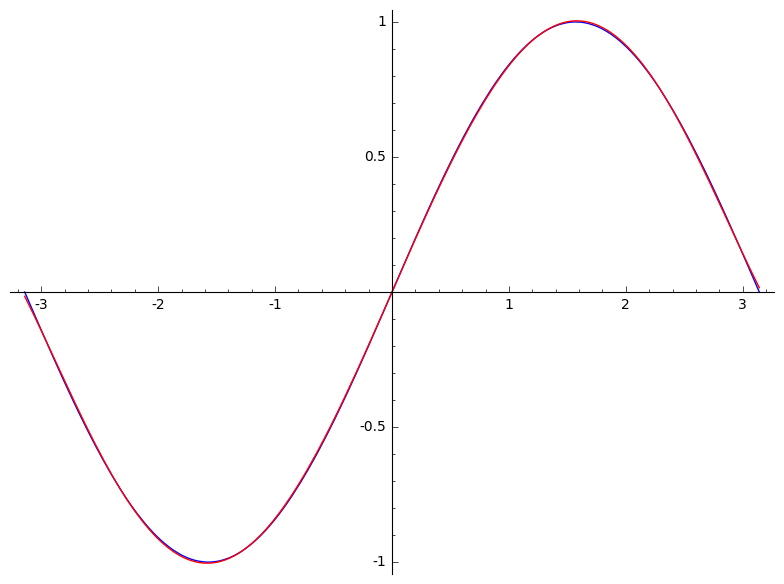

TypeError: 'sage.rings.rational.Rational' object is not callable

In [229]:
def dot(f, g):
    """ Dot product of vectors of P3[-1, 1]"""
    return integrate(f*g, (x, -pi, pi))

def norm(f):
    """Norm of a vector `f`"""
    return sqrt(integrate(f*f, (x, -pi, pi)))

B = [1, x, x^2, x^3, x^4, x^5]  # Basis
E = []                # orthogonal basis

# Start `Gram-Schmidt` orthogonization! 
for i in range(len(B)):
    e = B[i]
    for j in range(i):
        e = e- dot(E[j], B[i])*E[j]
#     e = e/sqrt(dot(e, e))
    e = e/norm(e)
    E.append(e.expand())

approx = 0
for e in E:
    approx += dot(sin(x), e)*e
approx = approx.simplify()

show(approx)
show(plot(sin(x), (x, -pi, pi))+plot(approx, (x, -pi, pi), color='red'))

error = N(norm(approx(x)-sin(x)))
print("Error = ", error)

In [232]:
M = matrix(np.random.randn(3, 3))
MM = M-M.transpose()

show(det(MM))

M = matrix(np.random.randn(2, 2))
MM = M-M.transpose()

show(det(MM))

0.0

0.12071033108593918

## Pythagoras Pie Problem

A pie is divided into 100 guests. First gets 1%, 2nd gets 2% of what's left ans so on..
who got the largest piece.


In [237]:
ps = []
for i in (1..100):
    gets = RR((1-sum(ps))*i/100)
    ps.append(gets)
show(max(ps))

0.0628156509555295